1. What is a Decision Tree, and how does it work?
A Decision Tree is a supervised learning algorithm used for classification and regression tasks. It works by splitting the dataset into smaller subsets based on feature values, creating a tree structure where each node represents a decision rule, and each leaf represents a final output or class.

 2. What are impurity measures in Decision Trees ?
 Impurity measures quantify the "mixedness" of classes in a dataset at a node. Common impurity measures are:

Gini Impurity: Measures the probability of misclassifying a randomly chosen element.

Entropy: Measures the information content or uncertainty in the dataset.

3. What is the mathematical formula for Gini Impurity?
G=1− i=1∑Cp i2
Where:
pi​ is the proportion of instances belonging to class i.

C is the total number of classes.

 4. What is the mathematical formula for Entropy?

 H=−i=1∑Cpi log 2​ (pi)

 5. What is Information Gain, and how is it used in Decision Trees ?
 Information Gain is the reduction in entropy or impurity after a dataset is split on a feature. It is used to determine the best feature for splitting at each step of building the tree:
𝐼𝐺=𝐻𝑝𝑎𝑟𝑒𝑛𝑡−∑𝑖=1𝑘𝑛𝑖𝑛𝑡𝑜𝑡𝑎𝑙𝐻𝑖IG=H parent​ − i=1∑k/n totalniHi

6. What is the difference between Gini Impurity and Entropy ?
Gini Impurity: Focuses on the probability of misclassification and is computationally faster.

Entropy: Measures information gain and accounts for uncertainty. It is more sensitive to class distribution.

7. What is the mathematical explanation behind Decision Trees ?
 A Decision Tree works by recursively partitioning the dataset using a greedy algorithm that selects the split minimizing impurity (Gini/Entropy) or maximizing Information Gain. At each step, the algorithm evaluates all possible splits and chooses the one yielding the highest reduction in impurity.

8. What is Pre-Pruning in Decision Trees ?
 Pre-pruning stops tree growth early by setting constraints like a maximum depth, minimum samples per split, or a threshold for impurity reduction.

9. What is Post-Pruning in Decision Trees?
Post-pruning removes branches from a fully grown tree to reduce overfitting. This is done by evaluating the performance of branches on validation data

 10. What is the difference between Pre-Pruning and Post-Pruning ?
Pre-Pruning: Stops tree growth early, preventing overfitting at the cost of underfitting.

Post-Pruning: Grows the tree fully and removes overfitting branches later.


11. What is a Decision Tree Regressor?
A Decision Tree Regressor predicts continuous values by partitioning the data space into regions and assigning the mean or median value of the target variable within each region as the prediction.

 12. What are the advantages and disadvantages of Decision Trees?
 Advantages:

Easy to interpret and visualize.

Handles both numerical and categorical data.

Requires little data preprocessing.

Disadvantages:

Prone to overfitting.

Sensitive to small data changes (high variance).

Can create biased splits in imbalanced datasets.


 13. How does a Decision Tree handle missing values?
 Imputation: Replace missing values with the mean/median for numerical or mode for categorical features.

Surrogate Splits: Use alternative features that mimic the split decision of the missing value.

 14. How does a Decision Tree handle categorical features?
 Decision Trees handle categorical features by evaluating all possible splits of categories (e.g., binary split: 𝐴∈{𝑥,𝑦}A∈{x,y} vs. 𝐴∉{𝑥,𝑦}A∈/{x,y}) and choosing the one that maximizes Information Gain or minimizes impurity.


 15. What are some real-world applications of Decision Trees?
 Healthcare: Diagnosing diseases.

Finance: Credit risk assessment.

Retail: Customer segmentation and recommendation systems.

Manufacturing: Quality control and fault detection.

Education: Predicting student performance.


In [1]:
#16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [2]:
#17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
print("Feature Importances:", clf.feature_importances_)


Feature Importances: [0.01911002 0.01911002 0.40445656 0.5573234 ]


In [3]:
#18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred))


Accuracy (Entropy): 1.0


In [4]:
#19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.5365169034412629


In [7]:
#20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize using graphviz
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("iris_tree", format="png", cleanup=True)
graph.view()



'iris_tree.pdf'

In [8]:
#21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree
clf_limited = DecisionTreeClassifier(max_depth=3)
clf_full = DecisionTreeClassifier()

clf_limited.fit(X_train, y_train)
clf_full.fit(X_train, y_train)

print("Accuracy (depth=3):", accuracy_score(y_test, clf_limited.predict(X_test)))
print("Accuracy (full tree):", accuracy_score(y_test, clf_full.predict(X_test)))



Accuracy (depth=3): 1.0
Accuracy (full tree): 1.0


In [9]:
#22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
clf_default = DecisionTreeClassifier()
clf_custom = DecisionTreeClassifier(min_samples_split=5)

clf_default.fit(X_train, y_train)
clf_custom.fit(X_train, y_train)

print("Default Accuracy:", accuracy_score(y_test, clf_default.predict(X_test)))
print("min_samples_split=5 Accuracy:", accuracy_score(y_test, clf_custom.predict(X_test)))


Default Accuracy: 1.0
min_samples_split=5 Accuracy: 1.0


In [10]:
#23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, iris.target, test_size=0.3, random_state=42)

clf_unscaled = DecisionTreeClassifier().fit(X_train, y_train)
clf_scaled = DecisionTreeClassifier().fit(X_train_s, y_train_s)

print("Unscaled Accuracy:", accuracy_score(y_test, clf_unscaled.predict(X_test)))
print("Scaled Accuracy:", accuracy_score(y_test_s, clf_scaled.predict(X_test_s)))


Unscaled Accuracy: 1.0
Scaled Accuracy: 1.0


In [11]:
#24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, ovr_clf.predict(X_test)))


OvR Accuracy: 1.0


In [12]:
#25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.4f}")


sepal length (cm): 0.0382
sepal width (cm): 0.0000
petal length (cm): 0.0685
petal width (cm): 0.8933


In [13]:
#26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree
reg_restricted = DecisionTreeRegressor(max_depth=5)
reg_full = DecisionTreeRegressor()

reg_restricted.fit(X_train, y_train)
reg_full.fit(X_train, y_train)

print("MSE (max_depth=5):", mean_squared_error(y_test, reg_restricted.predict(X_test)))
print("MSE (full):", mean_squared_error(y_test, reg_full.predict(X_test)))


MSE (max_depth=5): 0.0
MSE (full): 0.0


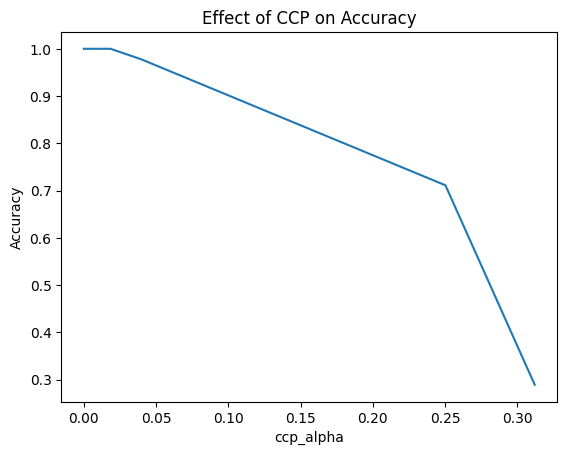

In [14]:
#27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

acc = []
for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=alpha)
    clf_pruned.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, clf_pruned.predict(X_test)))

import matplotlib.pyplot as plt
plt.plot(ccp_alphas, acc)
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of CCP on Accuracy")
plt.show()


In [15]:
#28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



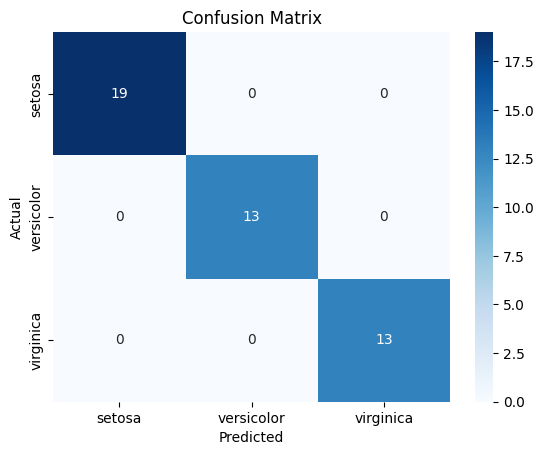

In [16]:
#29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
#30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.


from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best Cross-Validation Score: 0.9428571428571428
